In [1]:
### CONFIGURATION
### File Path
FILE_PATH = "/Users/GavinAJohnson/Python Projects/UCD Cert in Data Analytics/Data/"

### FILENAME
# LEI Data
lei_extract_file_path = FILE_PATH + "lei_extract_new_20230515.csv"
# Country Region Data
country_region_csv = FILE_PATH + "country_region_data.csv"

In [5]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Read files into DataFrames: df
df_lei_data = pd.DataFrame(pd.read_csv(lei_extract_file_path,",")) ### Add 'usecols', usecols=[0,11]
df_country_region = pd.DataFrame(pd.read_csv(country_region_csv,","))

# Test Print the head of the DataFrame
#print(df_lei_data.info())
#print(df_country_region.info())

C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_31064\1983342687.py:6: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_lei_data = pd.DataFrame(pd.read_csv(lei_extract_file_path,",")) ### Add 'usecols', usecols=[0,11]
C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_31064\1983342687.py:7: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_country_region = pd.DataFrame(pd.read_csv(country_region_csv,","))


In [7]:
### DataFrame Checks
print(df_lei_data.head())
print(df_country_region.head())

             Unnamed: 0                   lei  \
0  213800Q7JGGZ17BFJK36  213800Q7JGGZ17BFJK36   
1  213800YHLG3UD6GX3B03  213800YHLG3UD6GX3B03   
2  213800UAUYKHMWJ7C698  213800UAUYKHMWJ7C698   
3  213800EMIBZCJXSLY731  213800EMIBZCJXSLY731   
4  213800HT3D5IDEAUMD93  213800HT3D5IDEAUMD93   

                               legal_name       city country   ra_code  \
0                            BG GROUP PLC    READING      GB  RA000585   
1  DENCORA DEREHAM RETAIL PARTNERSHIP LLP    NORWICH      GB  RA000585   
2               STEETLEY DOLOMITE LIMITED    WORKSOP      GB  RA000585   
3          ECLIPSE ENERGY TRADING LIMITED    DORKING      GB  RA000585   
4         JOHN MORLEY (IMPORTERS) LIMITED  CONGLETON      GB  RA000585   

      ra_id elf_code other_legal_form     registration_date reg_status  \
0  03690065     B6ES              NaN  2013-12-18T00:00:00Z     LAPSED   
1  OC306928     Z0EY              NaN  2014-01-10T00:00:00Z     LAPSED   
2  04071554     H0PO              NaN 

reg_status
ANNULLED                35
DUPLICATE              664
ISSUED               88342
LAPSED              115510
PENDING_ARCHIVAL        14
Name: reg_status, dtype: int64


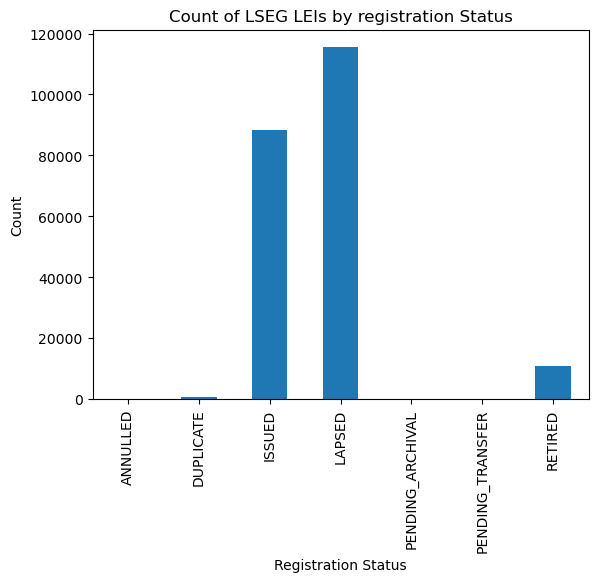

In [8]:
### PYPLOT Graph 1 - Count of LEI by registration status.
df_chart1 = df_lei_data.groupby(['reg_status'])['reg_status'].count()
print(df_chart1.head())
df_chart1.plot(kind='bar', x="reg_status", title="Count of LSEG LEIs by registration Status")
plt.xlabel("Registration Status")
plt.ylabel("Count")
plt.show()

In [9]:
### PYPLOT Graph 1 - Count of LEI by registration status.
df_chart1 = df_lei_data.groupby(['country','reg_status'])['reg_status'].count()
print(df_chart1.head())
print(df_chart1.shape)

country  reg_status
AD       ISSUED          3
         LAPSED          6
AE       DUPLICATE       6
         ISSUED        412
         LAPSED        492
Name: reg_status, dtype: int64
(489,)


In [11]:
###MERGE THE DATA FRAMES LEI DATA AND COUNTRY REGION DATA
#print(df_lei_data.head())
#print(df_country_region.head())
#Merge the LEI data dataframe with the country region dataframe
df_lei_country_region =  df_lei_data.merge(df_country_region, how='left', left_on='country', right_on='alpha_2')

# Test Prints
print(df_lei_country_region.info())
#print(df_lei_country_region.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215588 entries, 0 to 215587
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                215588 non-null  object 
 1   lei                       215588 non-null  object 
 2   legal_name                215588 non-null  object 
 3   city                      215588 non-null  object 
 4   country                   215578 non-null  object 
 5   ra_code                   215588 non-null  object 
 6   ra_id                     140602 non-null  object 
 7   elf_code                  215588 non-null  object 
 8   other_legal_form          111349 non-null  object 
 9   registration_date         215588 non-null  object 
 10  reg_status                215588 non-null  object 
 11  last_upadate_date         0 non-null       float64
 12  renewal_date              215588 non-null  object 
 13  last_update_date          215588 non-null  o

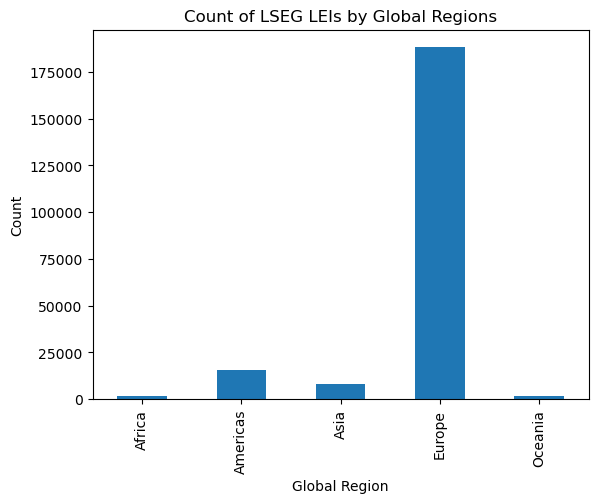

In [13]:
### PYPLOT Graph 1 - Count of LEI by Global Regions.
df_chart2 = df_lei_country_region.groupby(['region'])['lei'].count()
# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by Global Regions")
plt.xlabel("Global Region")
plt.ylabel("Count")
plt.show()

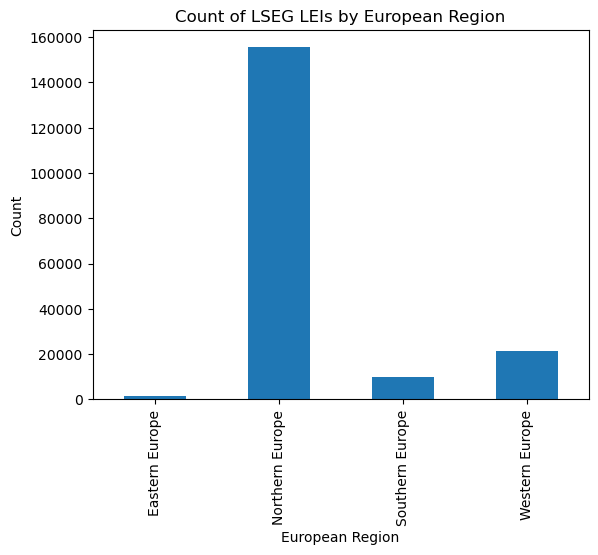

In [14]:
### PYPLOT Graph 1 - Count of LSEG LEIs by European Region.
df_lei_country_region2 = df_lei_country_region.query("region =='Europe'")
df_chart2 = df_lei_country_region2.groupby(['sub_region'])['lei'].count()
# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by European Region")

plt.xlabel("European Region")
plt.ylabel("Count")
plt.show()

sub_region
Latin America and the Caribbean    12062
Northern America                    3408
Name: lei, dtype: int64
(2,)


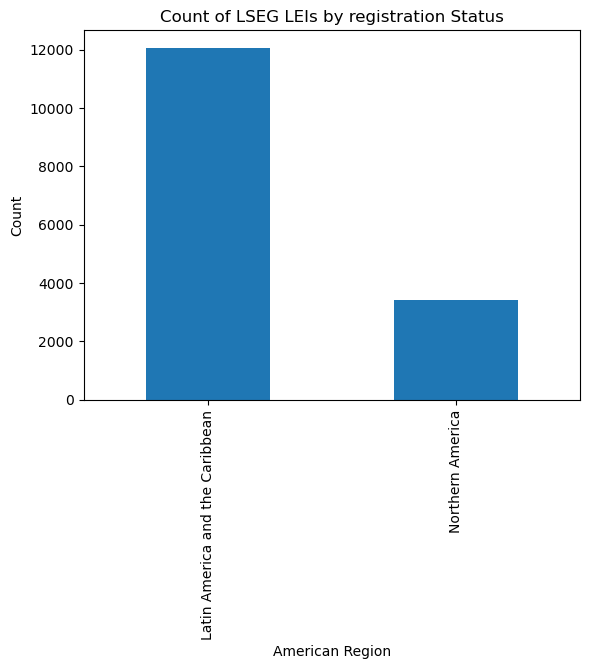

In [15]:
### PYPLOT Graph 1 - Count of LSEG LEIs by American Region.

#df_lei_country_region = df_lei_country_region.loc[df_lei_country_region['sub-region'] == region]
df_lei_country_region2 = df_lei_country_region.query("region =='Americas'")
df_chart2 = df_lei_country_region2.groupby(['sub_region'])['lei'].count()
print(df_chart2.head())
print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by registration Status")
plt.xlabel("American Region")
plt.ylabel("Count")
plt.show()

alpha_2
AG    10
AI    44
AR    69
AW     3
BB    40
Name: lei, dtype: int64
(38,)


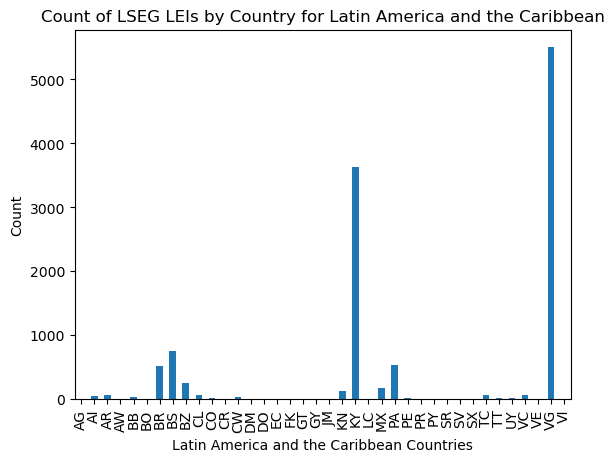

In [16]:
### PYPLOT Graph 1 - Count of LSEG LEIs by Country for Latin America and the Caribbean.
### https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

df_lei_country_region2 = df_lei_country_region.query("sub_region =='Latin America and the Caribbean'")
df_chart2 = df_lei_country_region2.groupby(['alpha_2'])['lei'].count()
print(df_chart2.head())
print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by Country for Latin America and the Caribbean")
plt.xlabel("Latin America and the Caribbean Countries")
plt.ylabel("Count")
plt.show()

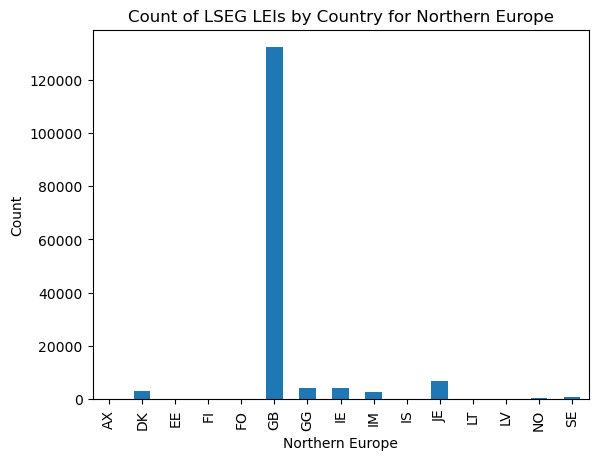

In [17]:
### PYPLOT Graph 1 - Count of LSEG LEIs by Country for Northern Europe.
### https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

#df_lei_country_region = df_lei_country_region.loc[df_lei_country_region['sub-region'] == region]
df_lei_country_region2 = df_lei_country_region.query("sub_region =='Northern Europe'")
df_chart2 = df_lei_country_region2.groupby(['country'])['lei'].count()
# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by Country for Northern Europe")
plt.xlabel("Northern Europe")
plt.ylabel("Count")
plt.show()

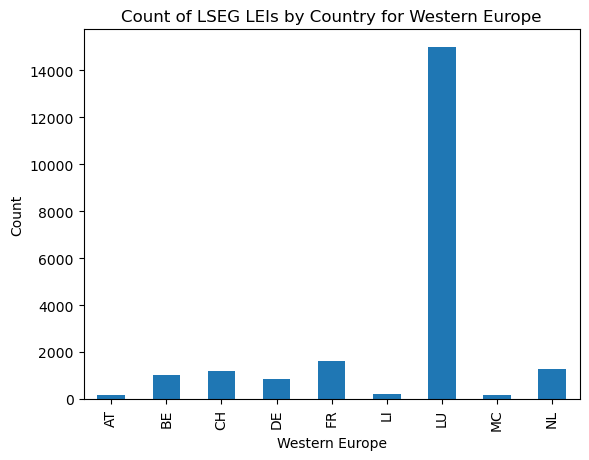

In [19]:
### PYPLOT Graph 1 - Count of LSEG LEIs by Country for Europe.
### https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

#df_lei_country_region = df_lei_country_region.loc[df_lei_country_region['sub-region'] == region]
df_lei_country_region2 = df_lei_country_region.query("sub_region =='Western Europe'")
df_chart2 = df_lei_country_region2.groupby(['country'])['lei'].count()
# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by Country for Western Europe")
plt.xlabel("Western Europe")
plt.ylabel("Count")
plt.show()

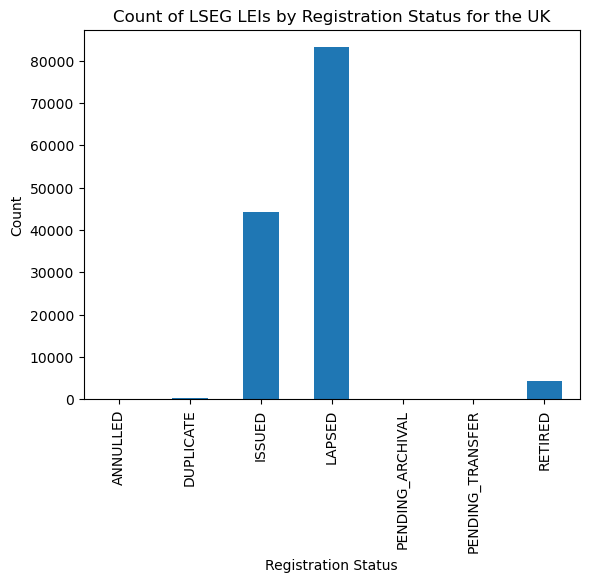

In [20]:
### PYPLOT Graph 1 - Count of LSEG LEIs by Registration Status for the UK.
### https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

df_lei_country_region2 = df_lei_country_region.query("country =='GB'")
df_chart2 = df_lei_country_region2.groupby(['reg_status'])['lei'].count()

# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', title="Count of LSEG LEIs by Registration Status for the UK")
plt.xlabel("Registration Status")
plt.ylabel("Count")
plt.show()

     ra_code    lei
16  RA000585  43771
17  RA000586    398
18  RA000587   1674
19  RA000588    239
20  RA000589   8562
(10, 2)


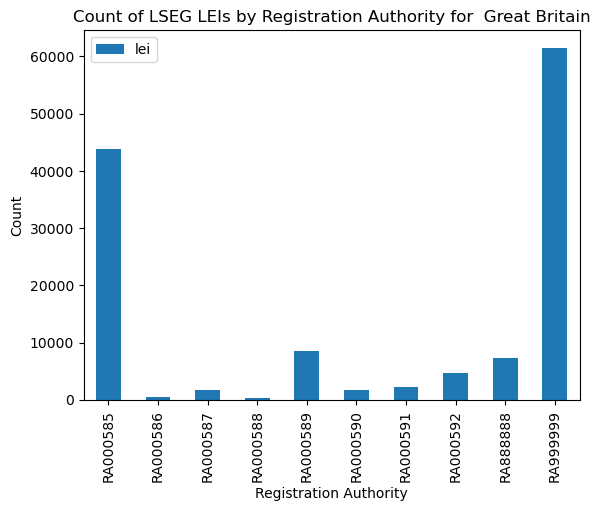

In [40]:
### PYPLOT Graph 1 - Count of LSEG LEIs by Registration Status for the UK.
### https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

df_lei_country_region2 = df_lei_country_region.query("country =='GB'")
#df_chart2 = df_lei_country_region2.groupby(['ra_code','reg_status'], as_index=False)['lei'].count()
df_chart2 = df_lei_country_region2.groupby(['ra_code'], as_index=False)['lei'].count()
df_chart2 = df_chart2[df_chart2['lei'] > 100]
df_chart2.set_index('ra_code')


# Test Prints
#print(df_chart2.head())
#print(df_chart2.shape)

df_chart2.plot(kind='bar', x='ra_code', y='lei', title="Count of LSEG LEIs by Registration Authority for  Great Britain")
plt.xlabel("Registration Authority")
plt.ylabel("Count")
plt.show()